In [1]:
# Import pandas 
import pandas as pd
import numpy as np
  
# reading csv file
# r stands for raw string, helps with unicode error (slashes)
filepath = r"C:\Users\krawc\OneDrive\Documents\DB\datasets\datacamp-master\gapminder1.csv"
#df1 = pd.read_csv(filepath, encoding = 'utf8', index_col=0)
df1 = pd.read_csv(filepath, encoding = 'utf8')

In [2]:
df1.head()

,Country,Year,fertility,life,population,child_mortality,gdp,region
0,Afghanistan,1964,7.671,33.639,10474903.0,339.7,1182.0,South Asia
1,Afghanistan,1965,7.671,34.152,10697983.0,334.1,1182.0,South Asia
2,Afghanistan,1966,7.671,34.662,10927724.0,328.7,1168.0,South Asia
3,Afghanistan,1967,7.671,35.170,11163656.0,323.3,1173.0,South Asia
4,Afghanistan,1968,7.671,35.674,11411022.0,318.1,1187.0,South Asia


In [3]:
df1.dropna(subset=['life','fertility'],inplace=True)

In [4]:
# Create arrays for features and target variable
y = df1.life.values
X = df1.fertility.values

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

<Axes: >

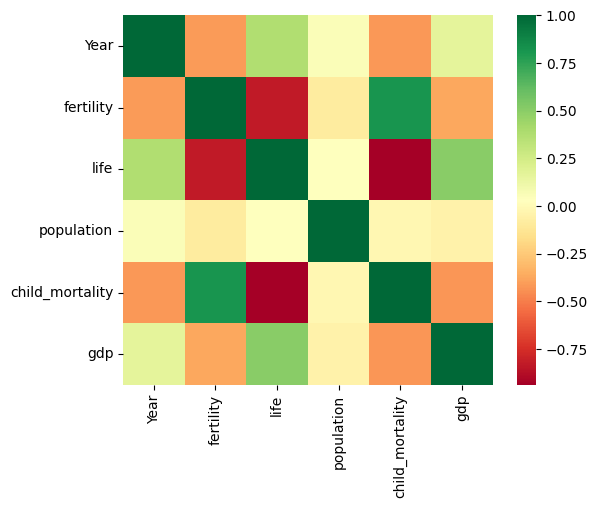

In [6]:
numeric = df1.select_dtypes(['int','float'])
# corelation matrix
import seaborn as sns
sns.heatmap(numeric.corr(), square=True, cmap='RdYlGn')

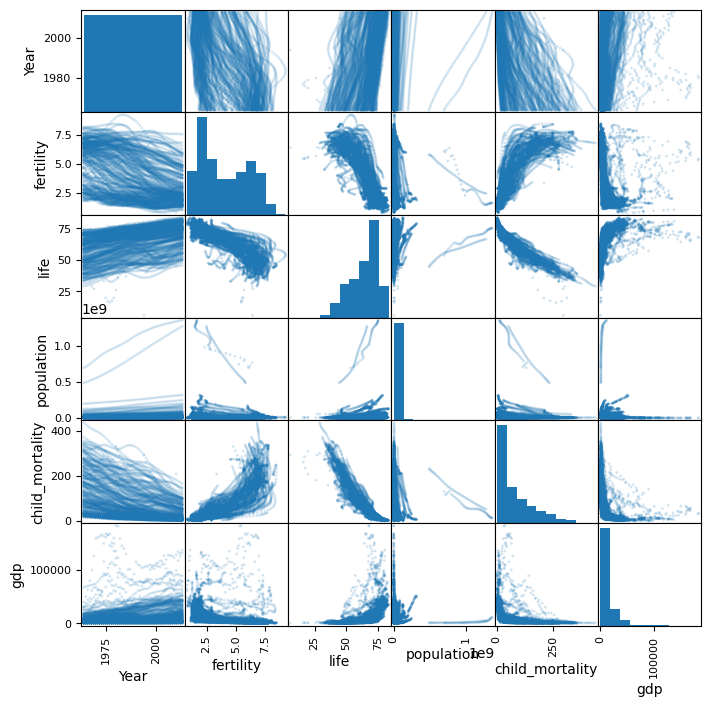

In [7]:
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(df1,figsize=[8,8],s=3,alpha=0.2,marker='D')
plt.show()

0.6925412523171749


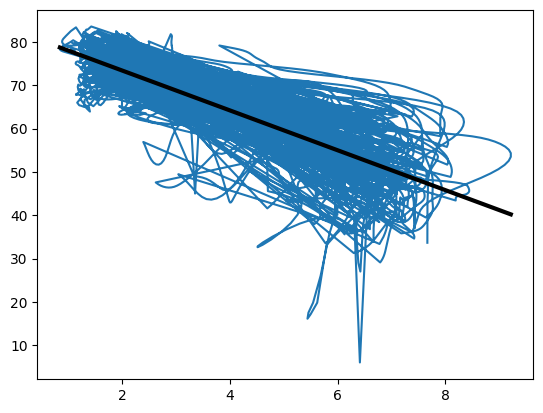

In [8]:
# drawing regresion line
# y life
# X fertility

import matplotlib.pyplot as plt
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

# Fit the model to the data
reg.fit(X,y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X,y))

plt.plot(X,y)
# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

In [9]:
# LinearRegression with all features

# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)


# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.6800191134796234
Root Mean Squared Error: 6.177876587909548


In [10]:
#CROSS VALIDATION

# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.74912446 0.76671737 0.57963895 0.67156009 0.62394052]
Average 5-Fold CV Score: 0.6781962756471378


In [108]:
#MULTI feature

In [11]:
df2=df1.select_dtypes('float').dropna()

y = df2.life.values

df2=df2.drop('life' ,axis='columns')
X = df2.values

# Reshape X and y
#y = y.reshape(-1,1)
#X = X.reshape(-1,1)

[-2.29705050e+00  5.08570333e-03 -8.12872054e+00  1.19564068e+00]


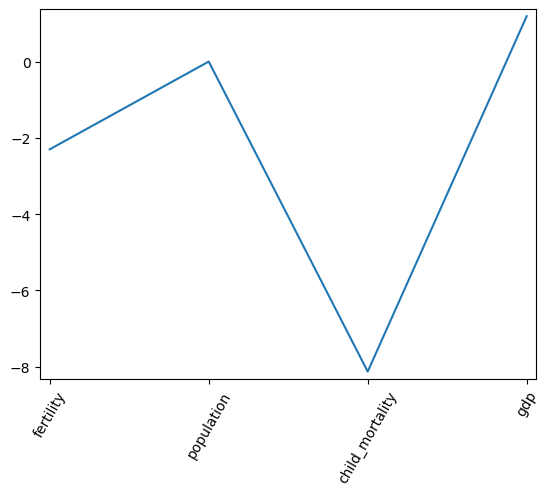

In [12]:
#LASSO

# Import Lasso
from sklearn.linear_model import Lasso

# # Instantiate a lasso regressor: lasso
# lasso = Lasso(alpha=0.1, normalize=True)
# # Fit the regressor to the data
# lasso.fit(X,y)
# # Compute and print the coefficients
# lasso_coef = lasso.coef_

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('lasso', Lasso(alpha=0.1))]
pipeline = Pipeline(steps)
lasso = pipeline.fit(X, y)
lasso_coef = pipeline.named_steps['lasso'].coef_

print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df2.columns)), lasso_coef)
plt.xticks(range(len(df2.columns)), df2.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [13]:
#categorical features

# Create dummy variables: df_region
df_region = pd.get_dummies(df1.region)
#df_region = pd.get_dummies(df1.region,drop_first=True)
# Print the columns of df_region
print(df_region.columns)



Index(['America', 'East Asia & Pacific', 'Europe & Central Asia',
       'Middle East & North Africa', 'South Asia', 'Sub-Saharan Africa'],
      dtype='object')


In [14]:
# Create dummy variables: 
df3=df1.join(pd.get_dummies(df1.region))
df3.drop('region',axis='columns', inplace=True)

df3=df3.select_dtypes('float').dropna()

y = df3.life.values

df3=df3.drop('life' ,axis='columns')
X = df3.values

In [15]:
# RIDGE
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.4)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

#compare to lasso
lasso_cv = cross_val_score(lasso, X, y, cv=5)
lasso_cv

[0.90839132 0.92584803 0.89669422 0.92447729 0.86052432]


c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.53645e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.74322e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=8.49839e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


array([0.9081163 , 0.92455406, 0.89761014, 0.92483722, 0.86039903])

c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.10334e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[-1.13802654e+00  9.52370957e-10 -1.02332844e-01  7.10089984e-05]


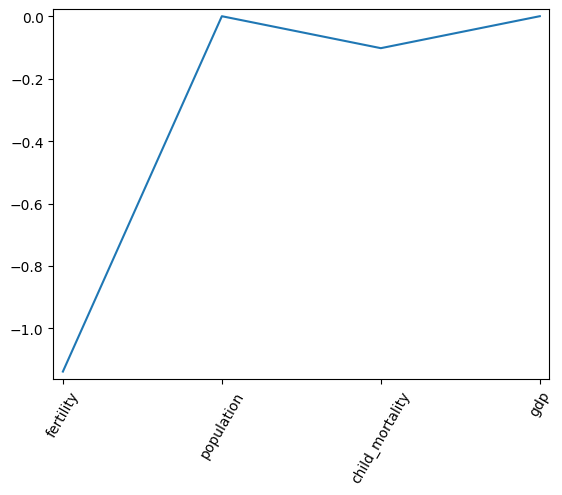

In [16]:
# Fit the regressor to the data
ridge.fit(X,y)

# Compute and print the coefficients

print(ridge.coef_)

# Plot the coefficients
plt.plot(range(len(df2.columns)), ridge.coef_)
plt.xticks(range(len(df2.columns)), df2.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Setup the pipeline steps: steps
steps = [#('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]
         
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.097e+05, tolerance: 5.435e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\krawc\OneDrive\Documents\code\pythons\scikit-projects\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.083e+05, tolerance: 5.401e+01 Linear regression models with null weight for the l1 regularizatio

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8907395663783207
